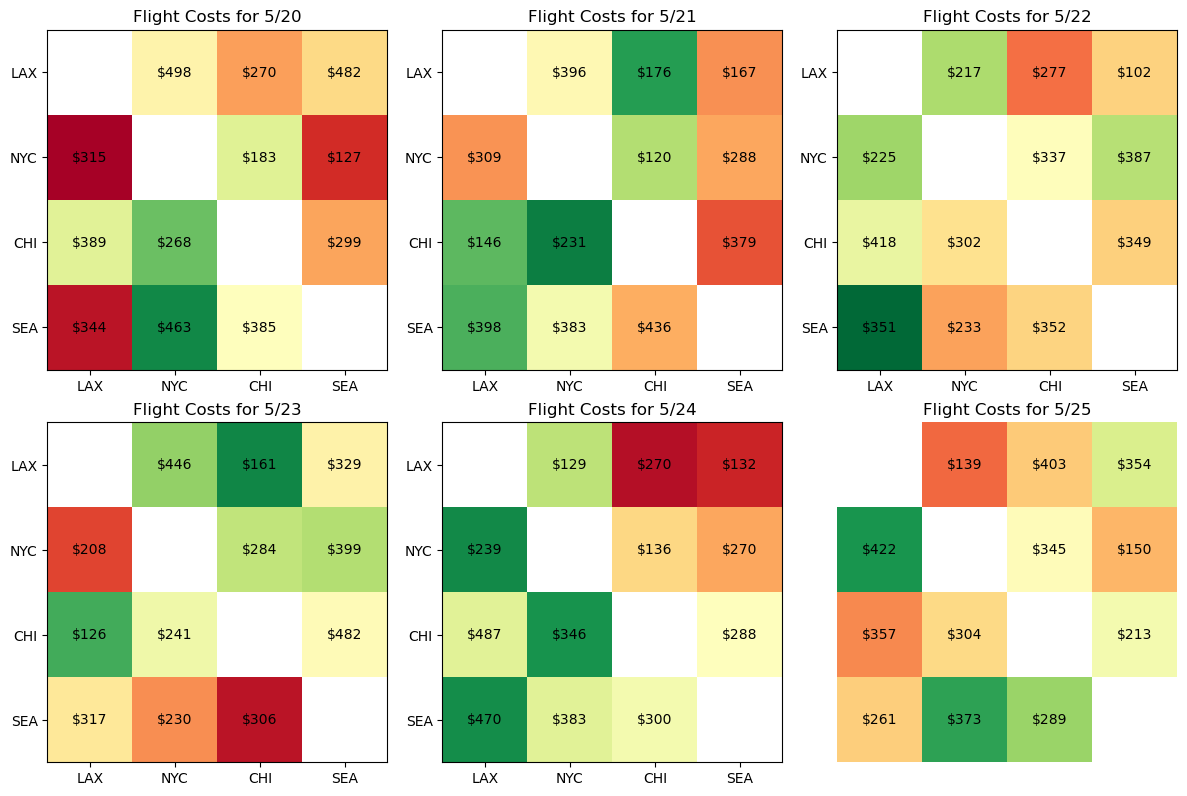

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

airports = ["LAX", "NYC", "CHI", "SEA"]
dates = ["5/20", "5/21", "5/22", "5/23", "5/24", "5/25"]

flight_costs = {}

for date in dates:
    for dep in airports:
        for arr in airports:
            if dep != arr:  # Exclude same-airport routes
                flight_costs[(dep, arr, date)] = random.randint(100, 500)

airport_indices = {"LAX": 0, "NYC": 1, "CHI": 2, "SEA": 3}
num_airports = len(airports)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns for 6 dates
axes = axes.flatten()  # Flatten axes for easier iteration

for i, date in enumerate(dates):
    ax = axes[i]
    
    # Create an empty cost matrix filled with NaN values for this date
    cost_matrix = np.full((num_airports, num_airports), np.nan)
    for dep in airports:
        for arr in airports:
            if dep != arr:
                cost_matrix[airport_indices[dep], airport_indices[arr]] = flight_costs[(dep, arr, date)]

    # Plot the heatmap using imshow, with the flight cost data
    cax = ax.imshow(cost_matrix, cmap='RdYlGn_r', vmin=100, vmax=500)  # Use the desired colormap and range
    
    # Overlay the text labels within the boxes
    for dep in airports:
        for arr in airports:
            if dep != arr:
                cost = flight_costs[(dep, arr, date)]
                ax.text(airport_indices[dep], airport_indices[arr], f"${cost}",
                        ha='center', va='center', fontsize=10, color='black')

    # Label axes
    ax.set_xticks(range(num_airports))
    ax.set_xticklabels(airports)
    ax.set_yticks(range(num_airports))
    ax.set_yticklabels(airports)
    ax.set_title(f"Flight Costs for {date}")

# Add a single colorbar for the heatmap

axes[-1].axis('off')  # Hide the extra subplot since there are only 5 dates

# Adjust layout and display
plt.tight_layout()
plt.show()


### gavin test

In [5]:
import matplotlib.pyplot as plt
import random
import numpy as np
import os
from matplotlib.colors import LinearSegmentedColormap

# Create the imgs directory if it doesn't exist
imgs_dir = "imgs"
if not os.path.exists(imgs_dir):
    os.makedirs(imgs_dir)

airports = ["LAX", "NYC", "CHI", "SEA"]
dates = ["5/20", "5/21", "5/22"]  # 3 days

flight_costs = {}

for date in dates:
    for dep in airports:
        for arr in airports:
            if dep != arr:  # Exclude same-airport routes
                flight_costs[(dep, arr, date)] = random.randint(100, 500)

airport_indices = {"LAX": 0, "NYC": 1, "CHI": 2, "SEA": 3}
num_airports = len(airports)

# Create a custom colormap - light blue to dark blue
colors = [(0.9, 0.95, 1), (0.7, 0.85, 1), (0.5, 0.7, 0.9), (0.3, 0.5, 0.8), (0.1, 0.2, 0.6)]
blue_cmap = LinearSegmentedColormap.from_list('blue_gradient', colors)

# Create a figure for each date and save as PNG
for date in dates:
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Create an empty cost matrix filled with NaN values for this date
    cost_matrix = np.full((num_airports, num_airports), np.nan)
    
    # Find the lowest and second lowest prices for this date
    all_prices = []
    for dep in airports:
        for arr in airports:
            if dep != arr:
                cost = flight_costs[(dep, arr, date)]
                cost_matrix[airport_indices[dep], airport_indices[arr]] = cost
                all_prices.append((cost, dep, arr))
    
    # Sort prices to find lowest and second lowest
    all_prices.sort()
    lowest_price, lowest_dep, lowest_arr = all_prices[0]
    second_price, second_dep, second_arr = all_prices[1]
    
    # Plot the heatmap using imshow with our custom blue colormap
    cax = ax.imshow(cost_matrix, cmap=blue_cmap, vmin=100, vmax=500)
    
    # Add colorbar
    cbar = plt.colorbar(cax, ax=ax)
    cbar.set_label('Flight Cost ($)')
    
    # Overlay the text labels and highlight the lowest price
    for dep in airports:
        for arr in airports:
            if dep != arr:
                cost = flight_costs[(dep, arr, date)]
                # Determine text color and cell highlight
                if dep == lowest_dep and arr == lowest_arr:
                    # Highlight the lowest price with a black rectangle
                    rect = plt.Rectangle((airport_indices[arr]-0.5, airport_indices[dep]-0.5), 1, 1, 
                                         fill=False, edgecolor='black', linewidth=3)
                    ax.add_patch(rect)
                    text_color = 'black'  # Changed to black
                    fontweight = 'bold'   # Keeping bold
                else:
                    text_color = 'black'
                    fontweight = 'normal'
                
                ax.text(airport_indices[arr], airport_indices[dep], f"${cost}",
                        ha='center', va='center', fontsize=10, 
                        color=text_color, fontweight=fontweight)
    
    # Label axes
    ax.set_xticks(range(num_airports))
    ax.set_xticklabels(airports)
    ax.set_yticks(range(num_airports))
    ax.set_yticklabels(airports)
    ax.set_title(f"Flight Costs for {date}", fontsize=12)
    
    # Save as PNG in the imgs directory
    plt.tight_layout()
    filename = os.path.join(imgs_dir, f"flight_costs_{date.replace('/', '_')}.png")
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    # Now create a second figure highlighting the second lowest price
    fig2, ax2 = plt.subplots(figsize=(8, 6))
    
    # Plot the same heatmap
    cax2 = ax2.imshow(cost_matrix, cmap=blue_cmap, vmin=100, vmax=500)
    
    # Add colorbar
    cbar2 = plt.colorbar(cax2, ax=ax2)
    cbar2.set_label('Flight Cost ($)')
    
    # Overlay the text labels and highlight the second lowest price
    for dep in airports:
        for arr in airports:
            if dep != arr:
                cost = flight_costs[(dep, arr, date)]
                # Determine text color and cell highlight
                if dep == second_dep and arr == second_arr:
                    # Highlight the second lowest price with a black rectangle
                    rect = plt.Rectangle((airport_indices[arr]-0.5, airport_indices[dep]-0.5), 1, 1, 
                                         fill=False, edgecolor='black', linewidth=3)
                    ax2.add_patch(rect)
                    text_color = 'black'  # Changed to black
                    fontweight = 'bold'   # Keeping bold
                else:
                    text_color = 'black'
                    fontweight = 'normal'
                
                ax2.text(airport_indices[arr], airport_indices[dep], f"${cost}",
                        ha='center', va='center', fontsize=10, 
                        color=text_color, fontweight=fontweight)
    
    # Label axes
    ax2.set_xticks(range(num_airports))
    ax2.set_xticklabels(airports)
    ax2.set_yticks(range(num_airports))
    ax2.set_yticklabels(airports)
    ax2.set_title(f"Flight Costs for {date}", fontsize=12)
    
    # Save second PNG in the imgs directory
    plt.tight_layout()
    second_filename = os.path.join(imgs_dir, f"flight_costs_{date.replace('/', '_')}_second_lowest.png")
    plt.savefig(second_filename, dpi=300, bbox_inches='tight')
    
    plt.close('all')  # Close all figures to free memory
    
    print(f"Saved {filename} and {second_filename}")

Saved imgs/flight_costs_5_20.png and imgs/flight_costs_5_20_second_lowest.png
Saved imgs/flight_costs_5_21.png and imgs/flight_costs_5_21_second_lowest.png
Saved imgs/flight_costs_5_22.png and imgs/flight_costs_5_22_second_lowest.png


In [7]:
import matplotlib.pyplot as plt
import random
import numpy as np
import os
from matplotlib.colors import LinearSegmentedColormap

# Create the imgs directory if it doesn't exist
imgs_dir = "imgs"
if not os.path.exists(imgs_dir):
    os.makedirs(imgs_dir)

airports = ["LAX", "NYC", "CHI", "SEA"]
dates = ["5/20", "5/21", "5/22"]  # 3 days

flight_costs = {}

for date in dates:
    for dep in airports:
        for arr in airports:
            if dep != arr:  # Exclude same-airport routes
                flight_costs[(dep, arr, date)] = random.randint(100, 500)

airport_indices = {"LAX": 0, "NYC": 1, "CHI": 2, "SEA": 3}
num_airports = len(airports)

# Create a custom soft grayscale colormap that's not too harsh at extremes
# Using light gray to medium gray instead of white to black
colors = [(0.9, 0.9, 0.9), (0.8, 0.8, 0.8), (0.7, 0.7, 0.7), (0.6, 0.6, 0.6), (0.5, 0.5, 0.5)]
soft_gray_cmap = LinearSegmentedColormap.from_list('soft_gray', colors)

# Create a figure for each date
for date in dates:
    # Focus on second-lowest price for special visualization
    fig2, ax2 = plt.subplots(figsize=(8, 6))
    
    # Create an empty cost matrix filled with NaN values
    cost_matrix = np.full((num_airports, num_airports), np.nan)
    
    # Find the lowest and second lowest prices
    all_prices = []
    for dep in airports:
        for arr in airports:
            if dep != arr:
                cost = flight_costs[(dep, arr, date)]
                cost_matrix[airport_indices[dep], airport_indices[arr]] = cost
                all_prices.append((cost, dep, arr))
    
    # Sort prices to find lowest and second lowest
    all_prices.sort()
    lowest_price, lowest_dep, lowest_arr = all_prices[0]
    second_price, second_dep, second_arr = all_prices[1]
    
    # Create a custom colormap (soft grayscale) for the base plot
    base_plot = ax2.imshow(cost_matrix, cmap=soft_gray_cmap, vmin=100, vmax=500)
    
    # Add colorbar
    cbar2 = plt.colorbar(base_plot, ax=ax2)
    cbar2.set_label('Flight Cost ($)')
    
    # Overlay the text labels
    for dep in airports:
        for arr in airports:
            if dep != arr:
                cost = flight_costs[(dep, arr, date)]
                # Default to grayscale
                text_color = 'black'
                fontweight = 'normal'
                
                # Special highlighting for the second lowest price
                if dep == second_dep and arr == second_arr:
                    # Highlight with the rectangle
                    rect = plt.Rectangle((airport_indices[arr]-0.5, airport_indices[dep]-0.5), 1, 1, 
                                         fill=True, edgecolor='black', facecolor='green', 
                                         linewidth=3, alpha=0.5)
                    ax2.add_patch(rect)
                    text_color = 'black'
                    fontweight = 'bold'
                
                ax2.text(airport_indices[arr], airport_indices[dep], f"${cost}",
                         ha='center', va='center', fontsize=10, 
                         color=text_color, fontweight=fontweight)
    
    # Label axes
    ax2.set_xticks(range(num_airports))
    ax2.set_xticklabels(airports)
    ax2.set_yticks(range(num_airports))
    ax2.set_yticklabels(airports)
    ax2.set_title(f"Flight Costs for {date}", fontsize=12)
    
    # Save second PNG in the imgs directory
    plt.tight_layout()
    second_filename = os.path.join(imgs_dir, f"flight_costs_{date.replace('/', '_')}_second_lowest_green.png")
    plt.savefig(second_filename, dpi=300, bbox_inches='tight')
    
    plt.close('all')  # Close all figures to free memory
    
    print(f"Saved special highlight visualization: {second_filename}")

Saved special highlight visualization: imgs/flight_costs_5_20_second_lowest_green.png
Saved special highlight visualization: imgs/flight_costs_5_21_second_lowest_green.png
Saved special highlight visualization: imgs/flight_costs_5_22_second_lowest_green.png


In [9]:
import matplotlib.pyplot as plt
import random
import numpy as np
import os
from matplotlib.colors import LinearSegmentedColormap

# Create the imgs directory if it doesn't exist
imgs_dir = "imgs"
if not os.path.exists(imgs_dir):
    os.makedirs(imgs_dir)

# Set random seed to ensure consistent results between visualizations
random.seed(42)

airports = ["LAX", "NYC", "CHI", "SEA"]
dates = ["5/20", "5/21", "5/22"]  # 3 days

flight_costs = {}

for date in dates:
    for dep in airports:
        for arr in airports:
            if dep != arr:  # Exclude same-airport routes
                flight_costs[(dep, arr, date)] = random.randint(100, 500)

airport_indices = {"LAX": 0, "NYC": 1, "CHI": 2, "SEA": 3}
num_airports = len(airports)

# Create a custom colormap - light blue to dark blue
colors_blue = [(0.9, 0.95, 1), (0.7, 0.85, 1), (0.5, 0.7, 0.9), (0.3, 0.5, 0.8), (0.1, 0.2, 0.6)]
blue_cmap = LinearSegmentedColormap.from_list('blue_gradient', colors_blue)

# Create a custom soft grayscale colormap
colors_gray = [(0.9, 0.9, 0.9), (0.8, 0.8, 0.8), (0.7, 0.7, 0.7), (0.6, 0.6, 0.6), (0.5, 0.5, 0.5)]
soft_gray_cmap = LinearSegmentedColormap.from_list('soft_gray', colors_gray)

# Create visualizations for each date
for date in dates:
    # Create an empty cost matrix filled with NaN values for this date
    cost_matrix = np.full((num_airports, num_airports), np.nan)
    
    # Find the lowest and second lowest prices for this date
    all_prices = []
    for dep in airports:
        for arr in airports:
            if dep != arr:
                cost = flight_costs[(dep, arr, date)]
                cost_matrix[airport_indices[dep], airport_indices[arr]] = cost
                all_prices.append((cost, dep, arr))
    
    # Sort prices to find lowest and second lowest
    all_prices.sort()
    lowest_price, lowest_dep, lowest_arr = all_prices[0]
    second_price, second_dep, second_arr = all_prices[1]
    
    #-------------------------------------------------------------------------------
    # VISUALIZATION 1: Blue gradient with lowest price highlighted in black
    #-------------------------------------------------------------------------------
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot the heatmap using imshow with our custom blue colormap
    cax = ax.imshow(cost_matrix, cmap=blue_cmap, vmin=100, vmax=500)
    
    # Add colorbar
    cbar = plt.colorbar(cax, ax=ax)
    cbar.set_label('Flight Cost ($)')
    
    # Overlay the text labels and highlight the lowest price with black
    for dep in airports:
        for arr in airports:
            if dep != arr:
                cost = flight_costs[(dep, arr, date)]
                # Determine text color and cell highlight
                if dep == lowest_dep and arr == lowest_arr:
                    # Highlight the lowest price with a black rectangle
                    rect = plt.Rectangle((airport_indices[arr]-0.5, airport_indices[dep]-0.5), 1, 1, 
                                         fill=False, edgecolor='black', linewidth=3)
                    ax.add_patch(rect)
                    text_color = 'black'
                    fontweight = 'bold'
                else:
                    text_color = 'black'
                    fontweight = 'normal'
                
                ax.text(airport_indices[arr], airport_indices[dep], f"${cost}",
                        ha='center', va='center', fontsize=10, 
                        color=text_color, fontweight=fontweight)
    
    # Label axes
    ax.set_xticks(range(num_airports))
    ax.set_xticklabels(airports)
    ax.set_yticks(range(num_airports))
    ax.set_yticklabels(airports)
    ax.set_title(f"Flight Costs for {date}", fontsize=12)
    
    # Save as PNG in the imgs directory
    plt.tight_layout()
    filename = os.path.join(imgs_dir, f"flight_costs_{date.replace('/', '_')}.png")
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()
    
    #-------------------------------------------------------------------------------
    # VISUALIZATION 2: Soft grayscale with second lowest price highlighted in green
    #-------------------------------------------------------------------------------
    fig2, ax2 = plt.subplots(figsize=(8, 6))
    
    # Create a custom colormap (soft grayscale) for the base plot
    base_plot = ax2.imshow(cost_matrix, cmap=soft_gray_cmap, vmin=100, vmax=500)
    
    # Add colorbar
    cbar2 = plt.colorbar(base_plot, ax=ax2)
    cbar2.set_label('Flight Cost ($)')
    
    # Overlay the text labels
    for dep in airports:
        for arr in airports:
            if dep != arr:
                cost = flight_costs[(dep, arr, date)]
                # Default to grayscale
                text_color = 'black'
                fontweight = 'normal'
                
                # Special highlighting for the second lowest price
                if dep == second_dep and arr == second_arr:
                    # Highlight with the rectangle
                    rect = plt.Rectangle((airport_indices[arr]-0.5, airport_indices[dep]-0.5), 1, 1, 
                                         fill=True, edgecolor='black', facecolor='green', 
                                         linewidth=3, alpha=0.5)
                    ax2.add_patch(rect)
                    text_color = 'black'
                    fontweight = 'bold'
                
                ax2.text(airport_indices[arr], airport_indices[dep], f"${cost}",
                         ha='center', va='center', fontsize=10, 
                         color=text_color, fontweight=fontweight)
    
    # Label axes
    ax2.set_xticks(range(num_airports))
    ax2.set_xticklabels(airports)
    ax2.set_yticks(range(num_airports))
    ax2.set_yticklabels(airports)
    ax2.set_title(f"Flight Costs for {date}", fontsize=12)
    
    # Save second PNG in the imgs directory
    plt.tight_layout()
    second_filename = os.path.join(imgs_dir, f"flight_costs_{date.replace('/', '_')}_second_lowest_green.png")
    plt.savefig(second_filename, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f"Saved visualizations for {date}:")
    print(f"  - {filename} (blue with lowest price highlighted)")
    print(f"  - {second_filename} (grayscale with second lowest price in green)")

print("\nAll visualizations complete!")

Saved visualizations for 5/20:
  - imgs/flight_costs_5_20.png (blue with lowest price highlighted)
  - imgs/flight_costs_5_20_second_lowest_green.png (grayscale with second lowest price in green)
Saved visualizations for 5/21:
  - imgs/flight_costs_5_21.png (blue with lowest price highlighted)
  - imgs/flight_costs_5_21_second_lowest_green.png (grayscale with second lowest price in green)
Saved visualizations for 5/22:
  - imgs/flight_costs_5_22.png (blue with lowest price highlighted)
  - imgs/flight_costs_5_22_second_lowest_green.png (grayscale with second lowest price in green)

All visualizations complete!
